in light of the results of Spectral signatures of axionlike dark matter (https://arxiv.org/pdf/2107.11948.pdf), I would like to see the effects of filtering a spectrum with bin width > 1e6

Take 1:

Make some noise data in frequency domain. Add to it a small signal of shape

$
\lambda(\nu)=\frac{2 c^{2}}{\sqrt{\pi} v_{0} v_{\text {lab }} \nu_{a}} \exp \left(-\frac{\beta^{2} v_{0}^{2}}{4 v_{\text {lab }}^{2}}-\frac{v_{\text {lab }}^{2}}{v_{0}^{2}}\right) \sinh \beta,
$
with
$
\beta=\frac{2 c v_{\mathrm{lab}}}{v_{0}^{2}} \sqrt{\frac{2\left(\nu-\nu_{a}\right)}{\nu_{a}}} .
$

This is too complicated for this first pass and looks like a blackbody spectrum so I'll use $\lambda(\nu) = 1/(e^x - 1)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib widget

Text(0, 0.5, 'Linear Power (arb)')

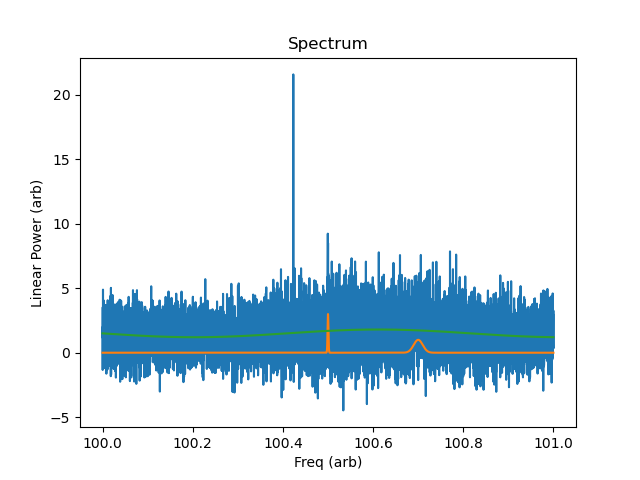

In [61]:
def fakeSpec(nu, nu0, deltaNu):
    x = (nu / deltaNu) - nu0
    norm = -1*(nu0*((nu0-3)*nu0+6)-6)*np.exp(nu0) * deltaNu
    spec =  x**3/(np.exp(x + nu0))
    spec = (spec > 0) * spec
    return spec

def gaussian(nu, nu0, deltaNu, a):
    return a * np.exp(-1/2 * (nu - nu0)**2 / deltaNu)
    #comment to ignore normilization
    #return a/(deltaNu * 2 * np.pi) * np.exp(-1/2 * (nu - nu0)**2 / deltaNu)
    
    

numBins = int(10e3)
freqStart= 100 
freqStop = 101
freqs = np.linspace(freqStart, freqStop, numBins)

noiseStd = 1
snr = 3
interferenceSigSnr = 1

signalAmp = snr * noiseStd
interferenceSigAmp = interferenceSigSnr * noiseStd

###generate spectrum in the frequency domain. White noise + other stuff##
antennaShit = .3 * np.sin(2.45*freqs* np.pi) +1.5
noiseSpec = np.random.normal(0, noiseStd, numBins) * antennaShit
signal = gaussian(freqs, 100.5, 1e-6, signalAmp)
#wide gaussian simulating interfering signal with wrong Q
interferenceSig = gaussian(freqs, 100.7, 1e-4, interferenceSigAmp)
spec = noiseSpec + signal + interferenceSig + antennaShit
spec[int(numBins * 0.423)] = spec[int(numBins* 0.423)] * 10

plt.close('all')
plt.figure()
plt.title('Spectrum')
plt.plot(freqs, spec)
plt.plot(freqs, signal + interferenceSig)
plt.plot(freqs, antennaShit)
plt.xlabel('Freq (arb)')
plt.ylabel('Linear Power (arb)')


Text(0, 0.5, 'no idea...')

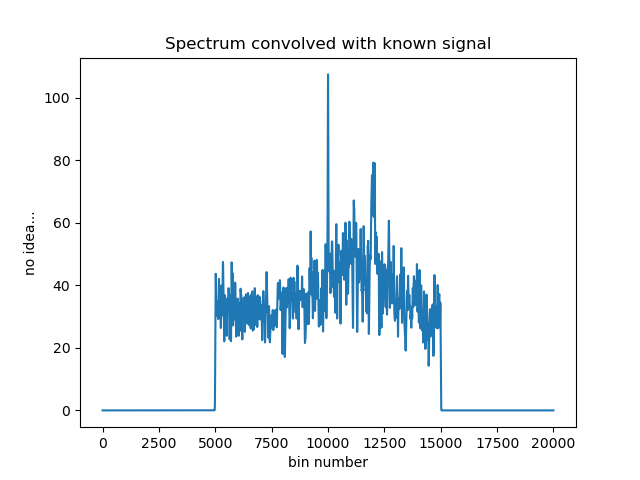

In [62]:
convolution = np.convolve(spec, gaussian(freqs, 100.5, 1e-6, 1))
plt.figure()

plt.plot(convolution)
plt.title('Spectrum convolved with known signal')
plt.xlabel('bin number')
plt.ylabel('no idea...')

In [ ]:
width = 10 #bins
filteredSpec = np.zeros(numBins - width)
print(spec)
print()
for i in range(numBins - width + 1):
    windowStart = i
    windowStop = i + width
     
